In [29]:
import os
import pandas as pd

inputdir = './cornell_movie_dialogs_corpus/cornell movie-dialogs corpus/'

In [33]:
# import re
# import tqdm

# with open(inputdir + 'movie_titles_metadata.txt', 'r', encoding='UTF-8') as f:
#     lines = f.readlines()


# with open(inputdir + 'movie_titles_metadata.csv', 'a', encoding='UTF-8') as f2:
#     for line in lines:
#         line = r'{}'.format(line)
#         text = re.sub(r' \+{3}\$\+{3} ', r'\t', line)
#         f2.write(text)

In [30]:
cornell = pd.read_csv(inputdir+'movie_titles_metadata.csv', sep='\t', header=None)

cornell.columns = ['id','title', 'year', 'rating', 'votes', 'genre']

cornell.head()

,id,title,year,rating,votes,genre
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill..."


In [11]:
import re

with open(inputdir + 'movie_lines.txt', 'r', encoding='UTF-8', errors='ignore') as f:
    lines = f.readlines()


with open(inputdir + 'movie_lines.csv', 'a', encoding='UTF-8') as f2:
    for line in lines:
        line = r'{}'.format(line)
        text = re.sub(r' \+{3}\$\+{3} ', '|', line)
        f2.write(text)

cornell2 = pd.read_csv(inputdir+'movie_lines.csv', sep='|', header=None, error_bad_lines=False)

cornell2.columns = ['id','char_id', 'movie_id', 'charname', 'line']

cornell2.head()

b'Skipping line 143731: expected 5 fields, saw 6\nSkipping line 143843: expected 5 fields, saw 6\nSkipping line 144013: expected 5 fields, saw 6\nSkipping line 144058: expected 5 fields, saw 6\nSkipping line 144067: expected 5 fields, saw 6\nSkipping line 144130: expected 5 fields, saw 6\nSkipping line 144168: expected 5 fields, saw 6\nSkipping line 223845: expected 5 fields, saw 9\nSkipping line 223950: expected 5 fields, saw 41\nSkipping line 223964: expected 5 fields, saw 6\nSkipping line 224056: expected 5 fields, saw 6\nSkipping line 224287: expected 5 fields, saw 6\n'


,id,char_id,movie_id,charname,line
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [12]:
len(cornell2)

303237

In [13]:
import spacy
import numpy as np
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
allowed = set('ADJ NOUN VERB'.split())

def prep(txt):
    toklst = []
    tokens = nlp(txt)
    if tokens:
        for t in tokens:
            if t.pos_ in allowed and t.is_alpha and not t.is_stop:
                toklst.append(t.text)
    return ' '.join(toklst).casefold()

groups = cornell2.groupby('movie_id')

cornell['text'] = np.NaN

for group in groups.groups:
    df = groups.get_group(group)
    print(group)
    lst = [str(value) for value in df.line.values]
    text = ' '.join(lst)
    text = prep(text)
    cornell.iloc[int(group[1:]), 6] = text


c:\Users\Gebruiker\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Gebruiker\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Gebruiker\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


m0
m1
m10
m100
m101
m102
m103
m104
m105
m106
m107
m108
m109
m11
m110
m111
m112
m113
m114
m115
m116
m117
m118
m119
m12
m120
m121
m122
m123
m124
m125
m126
m127
m128
m129
m13
m130
m131
m132
m133
m134
m135
m136
m137
m138
m139
m14
m140
m141
m142
m143
m144
m145
m146
m147
m148
m149
m15
m150
m151
m152
m153
m154
m155
m156
m157
m158
m159
m16
m160
m161
m162
m163
m164
m165
m166
m167
m168
m169
m17
m170
m171
m172
m173
m174
m175
m176
m177
m178
m179
m18
m180
m181
m182
m183
m184
m185
m186
m187
m188
m189
m19
m190
m191
m192
m193
m194
m195
m196
m197
m198
m199
m2
m20
m200
m201
m202
m203
m204
m205
m206
m207
m208
m209
m21
m210
m211
m212
m213
m214
m215
m216
m217
m218
m219
m22
m220
m221
m222
m223
m224
m225
m226
m227
m228
m229
m23
m230
m231
m232
m233
m234
m235
m236
m237
m238
m239
m24
m240
m241
m242
m243
m244
m245
m246
m247
m248
m249
m25
m250
m251
m252
m253
m254
m255
m256
m257
m258
m259
m26
m260
m261
m262
m263
m264
m265
m266
m267
m268
m269
m27
m270
m271
m272
m273
m274
m275
m276
m277
m278
m279
m28
m280
m281
m282


### Hey hoi

In [76]:
import numpy as np
import pandas as pd
cornell = pd.read_csv('new_cornell.csv', index_col=0)
cornell.head()

,id,title,year,rating,votes,genre,text
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",hope okay let gon need learn lie kidding know ...
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']",like smell sea smells cunt bad sign left weeks...
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']",officers killer duty arrest kill famous caught...
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']",trying hope continued sorry liberty discuss co...
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill...",great great air tires sell gas need chargin ba...


In [77]:
# len(cornell)
print(np.mean([len(value.split()) for value in cornell.text.values]))

1528.0777957860616


In [78]:
indexes = cornell[cornell['text'].isna() == True].index
cornell.loc[indexes]
# len(cornell)

,id,title,year,rating,votes,genre,text


In [79]:
# cornell.to_csv('new_cornell.csv')

In [80]:
def extra(lst):
    newlist = [item.strip()[1:-1] for item in lst]
    return newlist


cornell['genre'] = cornell.genre.apply(lambda x: x[1:-1].split(','))

cornell['genre'] = cornell.genre.apply(extra)

gens = [item for genre in cornell['genre'] for item in genre]
gens = set(gens)
print(gens)

{'', 'biography', 'family', 'comedy', 'sci-fi', 'action', 'romance', 'crime', 'drama', 'music', 'war', 'musical', 'documentary', 'sport', 'history', 'adventure', 'film-noir', 'horror', 'western', 'animation', 'thriller', 'fantasy', 'short', 'mystery', 'adult'}


In [81]:
for item in gens:
    cornell[item] = 0


In [82]:
for i in range(0, len(cornell)):
    gens = cornell.iloc[i,5]
    columns = cornell.columns
    for gen in gens:
        column_index = columns.get_loc(gen)
        cornell.iloc[i,column_index] = 1

In [83]:
cornell.describe()

,rating,votes,,biography,family,comedy,sci-fi,action,romance,crime,...,adventure,film-noir,horror,western,animation,thriller,fantasy,short,mystery,adult
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,6.863857,49820.962723,0.001621,0.040519,0.025932,0.257699,0.181524,0.256078,0.213938,0.235008,...,0.173420,0.006483,0.158833,0.019449,0.025932,0.429498,0.119935,0.008104,0.162075,0.001621
std,1.215233,61880.609145,0.040258,0.197332,0.159061,0.437722,0.385764,0.436819,0.410417,0.424348,...,0.378917,0.080321,0.365817,0.138209,0.159061,0.495406,0.325149,0.089728,0.368818,0.040258
min,2.500000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.200000,9919.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,27112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.800000,66781.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,9.300000,419312.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
cornell.to_csv('new_cornell.csv')

In [2]:
import pandas as pd
cornell = pd.read_csv('new_cornell.csv', index_col=0)
cornell.head()
cornell.head()

,id,title,year,rating,votes,genre,text,Unnamed: 8,biography,family,...,adventure,film-noir,horror,western,animation,thriller,fantasy,short,mystery,adult
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",hope okay let gon need learn lie kidding know ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']",like smell sea smells cunt bad sign left weeks...,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']",officers killer duty arrest kill famous caught...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']",trying hope continued sorry liberty discuss co...,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill...",great great air tires sell gas need chargin ba...,0,0,0,...,0,0,0,0,0,1,0,0,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1726cacaa60>,
 'caps': [<matplotlib.lines.Line2D at 0x1726cad5160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1726caca700>],
 'medians': [<matplotlib.lines.Line2D at 0x1726cad5820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1726cad5b80>],
 'means': []}

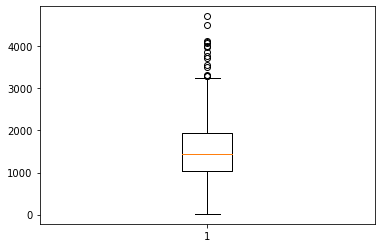

In [8]:
halp = [len(value.split()) for value in cornell.text.values]

import matplotlib.pyplot as plt

plt.boxplot(halp)

In [7]:
import numpy as np
np.mean(halp)

9779.247974068072

In [98]:
meta = {f"{cornell.iloc[i,0]}": {
            cornell.columns[j]: str(cornell.iloc[i,j])
            for j in range(8, 31)
        }
        for i in range(0, 31)
}

In [99]:
import json
with open("cornell.json", "w") as file:   
    json.dump(meta, file)

In [101]:
dr = './cornell_texts/'

for i in range(0,len(cornell)):
    try:
        with open(dr+f"{cornell.iloc[i,0]}", "w", encoding='UTF-8') as f:
            text = cornell.iloc[i,6]
            f.write(text)
    except OSError:
        print('A thing went wrong.')